In [1]:
import os
import dask.dataframe as dd
import graphviz
os.chdir("/home/admin123/Activity_Description/AR_data")
fp = "Phones_accelerometer.csv"
df = dd.read_csv(fp)

In [2]:
df.columns

Index([u'Index', u'Arrival_Time', u'Creation_Time', u'x', u'y', u'z', u'User',
       u'Model', u'Device', u'gt'],
      dtype='object')

In [3]:
req_cols = ["Index","User", "Creation_Time", "x", "y", "z", "gt"]

In [4]:
df = df[req_cols]

In [5]:
df.head()

,Index,User,Creation_Time,x,y,z,gt
0,0,a,1424696631913248572,-5.958191,0.688065,8.135345,stand
1,1,a,1424696631918283972,-5.952240,0.670212,8.136536,stand
2,2,a,1424696631923288855,-5.995087,0.653549,8.204376,stand
3,3,a,1424696631928385290,-5.942718,0.676163,8.128204,stand
4,4,a,1424696631933420691,-5.991516,0.641647,8.135345,stand


In [6]:
import datetime
import numpy as np
df["Creation_Time"] = df["Creation_Time"].astype("datetime64")

/home/admin123/anaconda/lib/python2.7/site-packages/pandas/core/internals.py:3714: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [7]:
#df = df[df["User"] == 'e'].compute()

In [8]:
df["date"] = df["Creation_Time"].dt.date

In [9]:
df["date"].head()

0    2015-02-23
1    2015-02-23
2    2015-02-23
3    2015-02-23
4    2015-02-23
Name: date, dtype: object

In [10]:
df["hour"] = df["Creation_Time"].dt.hour

In [11]:
df["minute"] = df["Creation_Time"].dt.minute

In [12]:
df.columns

Index([u'Index', u'User', u'Creation_Time', u'x', u'y', u'z', u'gt', u'date',
       u'hour', u'minute'],
      dtype='object')

In [13]:
#dfs = df.set_index(["User","date", "hour", "minute"])


In [14]:
dfgb = df.groupby(["User","gt","date", "hour", "minute" ]).mean().compute()

In [15]:
len(dfgb.index)

2639

In [58]:
#dfgb.reset_index()
dfgb.head(20)

,level_0,index,User,gt,date,hour,minute,Creation_Time,Index,x,y,z
0,0,0,a,bike,2015-02-23,13,30,NaN,290092.0,-4.895992,0.420529,8.745772
1,1,1,a,bike,2015-02-23,13,31,NaN,297413.5,-4.771115,0.227741,8.895711
2,2,2,a,bike,2015-02-23,13,32,NaN,305203.5,-4.722528,0.265253,8.917659
3,3,3,a,bike,2015-02-23,13,33,NaN,311814.0,-4.900786,0.087041,8.845624
4,4,4,a,bike,2015-02-23,13,34,NaN,318346.0,-4.793545,0.162035,8.903905
5,5,5,a,bike,2015-02-23,13,35,NaN,322752.0,-4.491119,0.484359,9.031090
6,6,6,a,bike,2015-02-23,14,1,NaN,283409.0,-4.908196,0.456612,8.387537
7,7,7,a,bike,2015-02-23,14,2,NaN,292708.5,-4.835586,0.351113,8.498096
8,8,8,a,bike,2015-02-23,14,3,NaN,302107.5,-4.654283,0.495553,8.579089
9,9,9,a,sit,2015-02-23,13,9,NaN,60954.5,0.398511,-0.519361,10.254015


In [54]:
import seaborn as sns


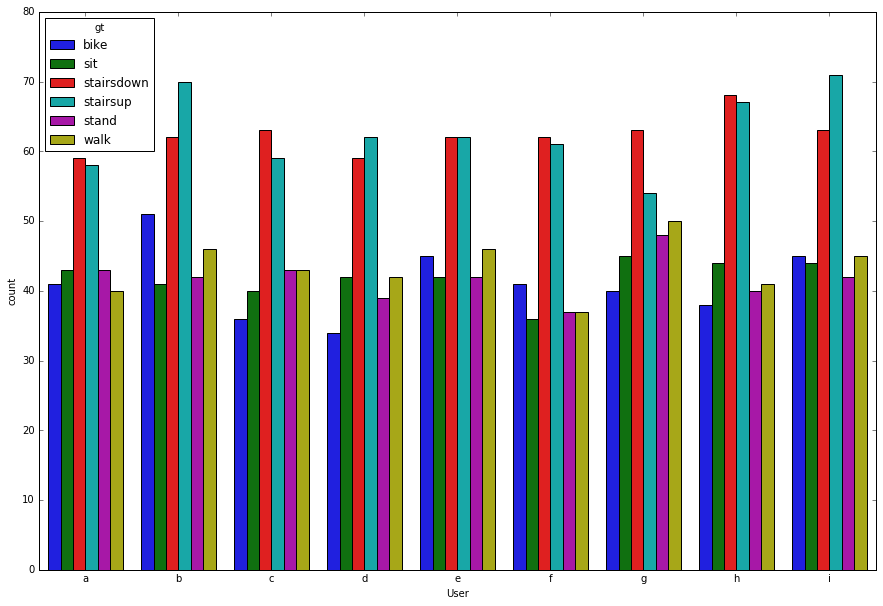

In [70]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
f, ax = plt.subplots(1, 1, figsize = (15, 10))
sns.countplot(x = "User", hue = "gt", data = dfgb)

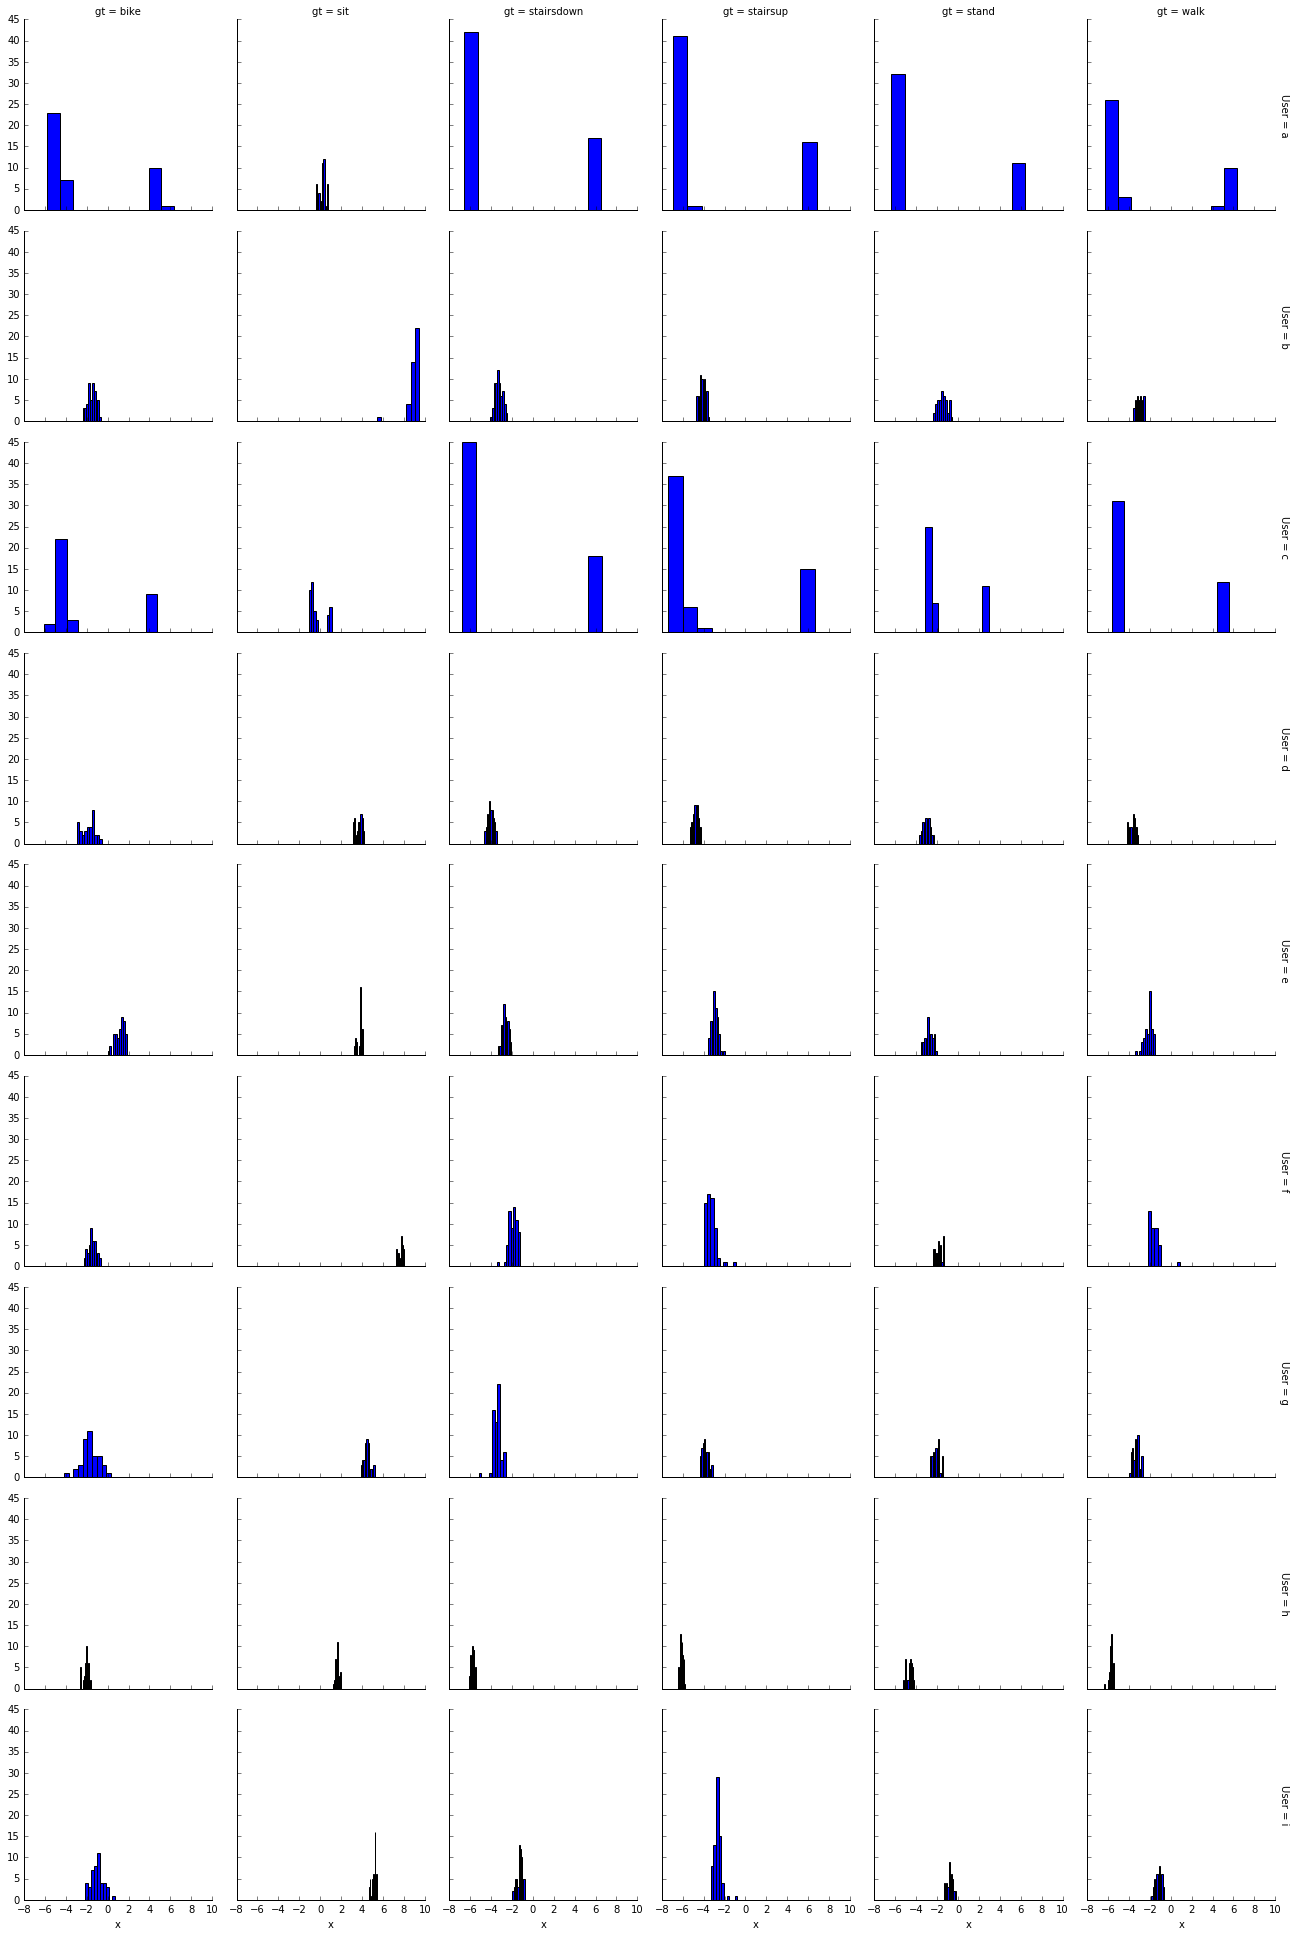

In [71]:


grid = sns.FacetGrid(dfgb, row="User", col="gt", margin_titles=True)
grid.map(plt.hist, "x")